# Praktikum 3

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import correlate

print(np.version.version)
print(sp.version.full_version)

1.16.2
0.19.1


## Elementarsignale

**Aufgabe:** Implementieren Sie die folgende Funktion, die ein Rechtecksignal erzeugt. Das Signal soll Länge ```n``` haben. Das Rechteck soll um den Nullpunkt zentriert sein und eine Breite von ```T``` haben.

Hinweis: Folgende Numpy Funktionen könnten hilfreich sein: ones, zeros, append.

In [27]:
def rect(n, T):
    """
    Creates a rectangle. The rectangle has width T, 
    is centered around 0 and the complete signals has t samples. The amplitude is 1.
    Example:
        rect(11,5) returns np.array([00011111000])
    
    Parameters:
        n : integer
            Numper of discrete samples.
        T : integer 
            Width of rectangle
        
    Returns:
        numpy.array x
            len(x) = n
            sum(x) = T
        
    """
    
    x = np.zeros(n)
    start = int((n-T)/2)
    end = start + T
    for i in range(start, end):
        x[i] = 1
    return x

**Aufgabe:** Plotten Sie nun ein Rechteck mit n=2000 und T=10.

Hinweis: Verwenden Sie anstelle der Funktion ```plot``` die Funktion ```step```, um schöne Rechtecke zu erhalten.

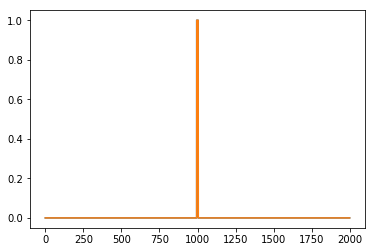

In [31]:
y_axis = rect(2000, 10)
x_axis = [i for i in range(0,2000)]
plt.step(x_axis, y_axis)

**Aufgabe:** Im letzten Praktikum haben Sie eine Funktion zur Erzeugung von sinusförmigen Signalen implementiert. Kopieren Sie diese Funktion in die folgende Zelle:

In [32]:
def sine_wave(f=10, phi=0, A=1, t=1, Fs=100):
    """
    This function creates a sine wave of the given frequency, duration, a phase angle using Fs samples per second.
    
    Parameters:
        f : int
            The frequency of the sine wave in Hz.
        phi : int
            The phase angle in radians
        A : float
            The amplitude
        t : float
            The duration (0..t) in s
        Fs : int
            The sampling rate (samples per second)
        
    Returns:
        Numpy Array with the generated signal
            
    """
    
    omega = 2*np.pi*f 
    Ts    = 1/Fs
    N     = int(t/Ts) # total number of samples for the given duration and sample rate
    
    # some additional information just for fun
    cycles =   t/(1/f) # number of cycles of the sine wave that will be plot
    samples_per_cycle = int(N/cycles) # number of samples per cycle
    
    # Create a numpy array with N discrete points in time starting
    # from 0 with a step size of Ts.    
    t_vec = []
    for i in range(0,N):
        t_vec.append(i*Ts)
        
    # Now calculate the sine wave as numpy array
    x_vec = []
    for i in range(0,N):
        x_vec.append(A*np.sin(omega*t_vec[i] + phi))
    
    d = {"total" : N, "cycles" : cycles, "samples_per_cycle" : samples_per_cycle}
    
    return t_vec, x_vec, d

**Aufgabe:** Erzeugen Sie nun zwei Sinus-Signale x1[t] mit einer Frequenz von 1 Hz und x2[t] mit einer Frequenz von 10 Hz.

In [61]:
t1,x1,_ = sine_wave(f=1) 
t2,x2,_ = sine_wave(f=10) 

**Aufgabe:** Plotten Sie die beiden Signale x1[t] und x2[t] in einem Plot in den Farben blau und rot.

<function matplotlib.pyplot.show>

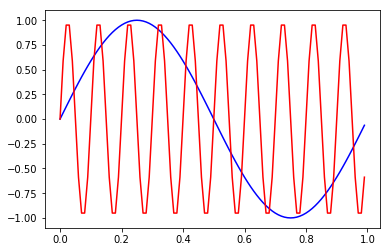

In [39]:
plt.plot(t1,x1,'b')
plt.plot(t2,x2,'r')
plt.show

**Aufgabe:** Addieren Sie nun die beiden signale x1[t] und x2[t] und plotten Sie das Ergebnis.

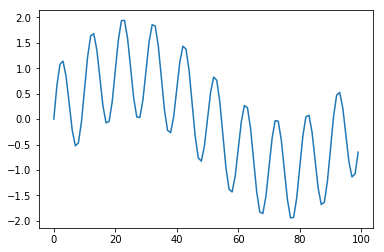

In [41]:
x12 = np.array(x1) + np.array(x2)
plt.plot(x12)

**Aufgabe:** Experimentieren Sie ein wenig mit verschiedenen Frequenzen, addieren Sie mehr als zwei Sinus-Signale und verwenden Sie auch mal die Multiplikation anstelle der Addition.

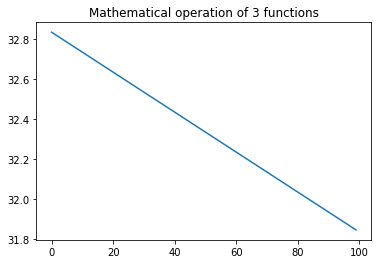

In [62]:
t3,x3,_ = sine_wave(f=5)
t4,x4,_ = sine_wave(f=20)
t5,x5,_ = sine_wave(f=80)
# Mathematical operation of 3 functions
t345 = np.dot(np.array(t4),np.array(t5)) - np.array(t3)
plt.plot(t345)
plt.show
plt.title('Mathematical operation of 3 functions')

## Korrelation von Signalen

**Aufgabe:** Erzeugen Sie nun zwei Sinus-Signale x1[t] und x2[2] mit jeweils 1 Hz. x1[t] soll 10 Sekunden umfassen, x2[t] 1 Sekunde.

In [63]:
t1,x1,_ = sine_wave(f=1, t=10)
t2,x2,_ = sine_wave(f=1, t=1)

**Aufgabe:** Verwenden Sie nun die Funktion ```correlate``` aus dem Numpy Modul, um die beiden Signale zu korrelieren. Plotten Sie das Ergebnis.

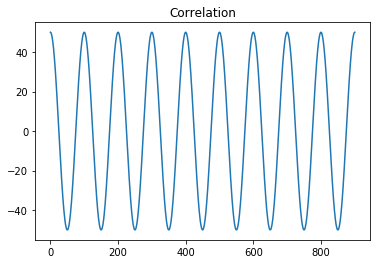

In [58]:
corr = np.correlate(x1,x2)
plt.plot(corr)
plt.title('Correlation')

**Aufgabe:** Experimentieren Sie mit verschiedenen Parametern. Verschieben Sie zum Beispiel x2[t] um einen Phasenwinkel phi und betrachten Sie das Ergebnis der Korrelation.

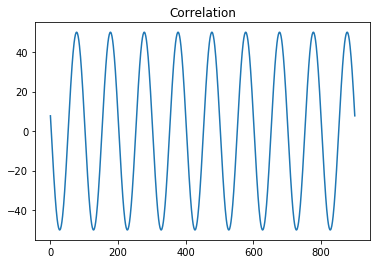

In [64]:
t2,x2,_ = sine_wave(f=1, t=1, phi=30)
corr2 = np.correlate(x1,x2)
plt.plot(corr2)
plt.title('Correlation')

## Faltung von Signalen

**Aufgabe:** Als nächstes wollen wir ein gestörtes Signal (x3) simulieren, welches aus dem eigentlichen Signal (x1) und einem Störsignal (x2) besteht. Führen Sie bitte die folgende Zelle aus. Dort werden zwei Sinus-Signale erzeugt und übereinandergelagert. Das erzeugte ist über die Variable ```x3``` ansprechbar. 

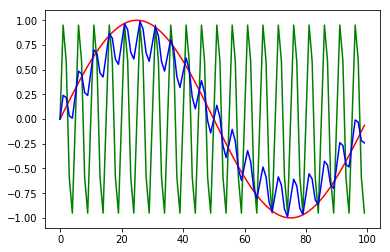

In [91]:
# DOT NOT CHANGE THE CONTENT OF THIS CELL
_,x1,_ = sine_wave(f=1, t=1)
_,x2,_ = sine_wave(f=20, t=1)
x3 = 0.8*np.array(x1) + 0.2*np.array(x2)
plt.plot(x1, 'r')
plt.plot(x2, 'g')
plt.plot(x3, 'b')
#plt.axis("off")
plt.show()

**Aufgabe:** Erzeugen Sie ein Signal h[t], welches l=30 Samples "lang" ist und an jeder Stelle den Wert 1/l hat (Hinweis: np.ones(...)).

In [76]:
def hSignalGenerator(l):
    h = 1/l*np.ones(l)
    return h
h1 = hSignalGenerator(30)

**Aufgabe:** Verwenden Sie nun die Numpy Funktion ```convolve```, um das Signal ```x3``` mit dem Signal ```h``` zufalten und plotten Sie das Ergebnis zusammen mit dem Signal ```y[t]```. Verwenden Sie bitte als Parameter ```mode="same"```. Was fällt Ihnen auf?

In [77]:
conv = np.convolve(h1, x3, mode='same')

**Aufgabe:** Testen Sie nun Signale h[t] mit unterschiedlichen Längen (40, 50, 100, 1000, ...). Berechnen Sie für jedes generierte Signal die *Sum of Squared Differences*, definiert als
$$SSD(y,x) = \sum_{i=0}^{l} \sqrt{(y(l)-x(l))^2}$$, um den Fehler zwischen Ihrem generierten Signal (y) und dem Signal x1 zu berechnen. Für welche Länge l des Signals h ist SSD am kleinsten?

Hinweis: Hilfreich könnten sein: np.sum, np.sqrt

In [92]:
def SSD(y,x):
    ssd = 0
    if type(y) == type([]):
        y = np.array(y)
    if type(x) == type([]):
        x = np.array(x)
    for i in range(0,len(y)):
        ssd = ssd + np.abs(y[i]-x[i])
    return ssd
# Test SSD function result of h2 and x1
h2 = hSignalGenerator(len(x1))
print(SSD(h2,x1))

63.66103190754791
